In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Load the data into the pandas environment and identify some basic details of the 
dataset

In [5]:
df=pd.read_excel(r'C:\Users\Simi.Jacob\OneDrive - EY\ICT\code\iris.xls')

In [6]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
df['SL']= df['SL'].fillna(df['SL'].mean())
df['SW']= df['SW'].fillna(df['SW'].mean())
df['PL']= df['PL'].fillna(df['PL'].mean())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
for i in df.columns:
    print(i,df[i].unique())

SL [5.1 4.9 nan 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 4.7 5.5 4.5 5.3 7.  6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.4 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SW [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 nan 4.  4.4 3.8 3.7 3.3 4.1 4.2 2.3 2.8
 2.4 2.7 2.  2.2 2.5 2.6]
PL [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 nan 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5
 4.2 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 5.3
 5.5 6.7 6.9 5.7 6.1 6.4 5.4 5.2]
PW [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Classification ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


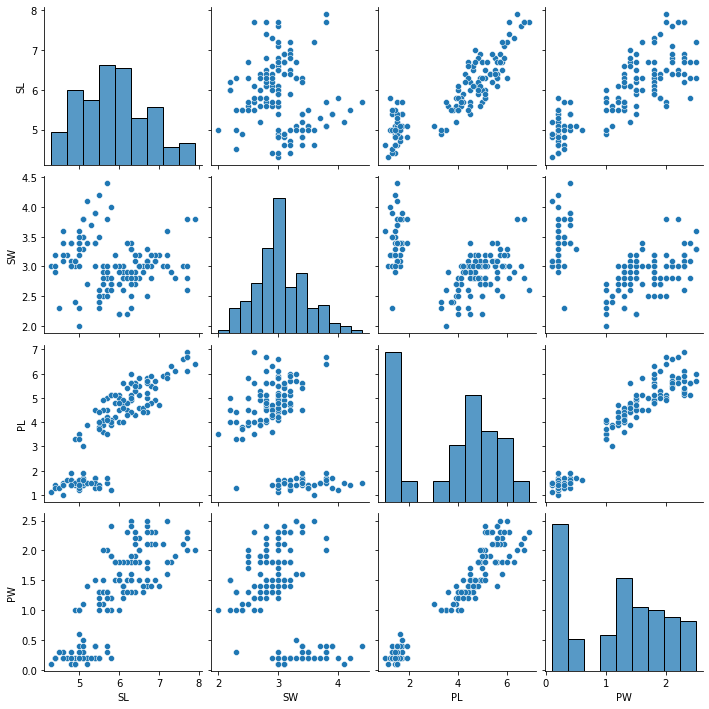

In [13]:
sns.pairplot(df)

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [20]:
le = LabelEncoder()
for i in ["Classification"]:
    df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [22]:
y = df['Classification']

In [23]:
df.drop('Classification', axis =1)

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size = 0.2, random_state = 101)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
forest = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state =101) 

In [29]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [30]:
preds = forest.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, plot_confusion_matrix

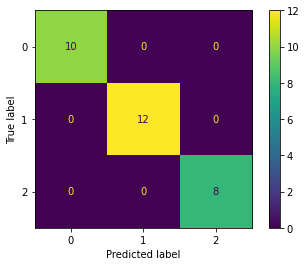

In [33]:
plot_confusion_matrix(forest, X_test, y_test)

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

